
 ### Name: Sravan Phani Kumar Kopparthi
 ### Course number: MSDB-566
 ### Date: 09/20/25
 ### Honor statement:

In [5]:
# modules
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# dataset
# edit as needed to load your dataset
data = pd.read_csv('/Users/sravanphanikumarkopparthi/Documents/PHD/MSDB-566/Assigment/Air_Quality_and_Pollen_Count.csv')

data.head()

,OBJECTID,AQI,Category,ResponsiblePollutant,PollenCount,PollenType,PollenDescription,ReportDateTime
0,1,47.0,Good,PM2.5,9.0,Juniper,Maple,2025/04/04 05:00:00+00
1,2,49.0,Good,PM2.5,1.0,Elm,Juniper,2025/04/03 05:00:00+00
2,3,51.0,Moderate,PM2.5,11.0,Elm,Juniper,2025/04/02 05:00:00+00
3,4,50.0,Good,PM2.5,10.0,Elm,Juniper,2025/04/01 05:00:00+00
4,5,50.0,Good,PM2.5,2.0,Elm,Juniper,2025/03/31 05:00:00+00


In [7]:
data.describe()

,OBJECTID,AQI,PollenCount
count,8920.000000,8692.000000,5075.000000
mean,4460.500000,45.268293,16.173596
std,2575.126534,16.603862,67.429182
min,1.000000,0.000000,0.000000
25%,2230.750000,34.000000,3.000000
50%,4460.500000,44.000000,6.000000
75%,6690.250000,52.000000,9.000000
max,8920.000000,151.000000,1666.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8920 entries, 0 to 8919
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   OBJECTID              8920 non-null   int64  
 1   AQI                   8692 non-null   float64
 2   Category              8920 non-null   object 
 3   ResponsiblePollutant  8690 non-null   object 
 4   PollenCount           5075 non-null   float64
 5   PollenType            4687 non-null   object 
 6   PollenDescription     8800 non-null   object 
 7   ReportDateTime        8920 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 557.6+ KB


In [9]:
# checking the number of original patients
original_shape = data.shape
print(f'Original data shape: {original_shape}')
# remove rows with NaNs
clean_data = data.dropna(how='any', axis=0)
print(f'New data shape: {clean_data.shape}')
print(f'Number of rows removed: {original_shape[0] - clean_data.shape[0]}')



Original data shape: (8920, 8)
New data shape: (4672, 8)
Number of rows removed: 4248


#### Question 1: Explore the data by plotting AQI and Category across the years in two separate plots. Make sure they have proper labels and titles. Use a datetime format for the dates.

In [10]:
# Format to YYYY-MM-DD string
from datetime import date
clean_data['ReportDateTime'] = pd.to_datetime(clean_data['ReportDateTime'])
#clean_data['ReportDateTime'] = clean_data['ReportDateTime'].dt.date
print(clean_data['ReportDateTime'].min())
print(clean_data['ReportDateTime'].max())

2001-03-01 06:00:00+00:00
2025-04-04 05:00:00+00:00


/var/folders/q0/33zn28r13yg22lf2t7vpv50c0000gn/T/ipykernel_24884/2273436411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['ReportDateTime'] = pd.to_datetime(clean_data['ReportDateTime'])


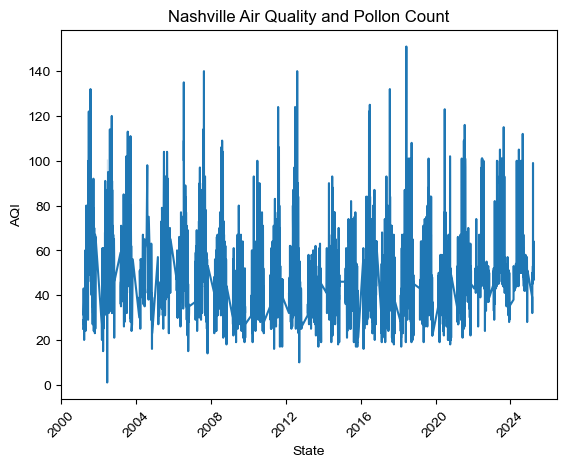

In [11]:

sns.lineplot(data=clean_data, x='ReportDateTime', y='AQI')
plt.xticks(rotation=45)  # Rotate state labels for readability
plt.xlabel('State')
plt.ylabel('AQI')
plt.title('Nashville Air Quality and Pollon Count')
sns.set_theme(rc={"figure.figsize": (30, 12)})
plt.show()


/var/folders/q0/33zn28r13yg22lf2t7vpv50c0000gn/T/ipykernel_24884/3759775566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Year'] = clean_data['ReportDateTime'].dt.year


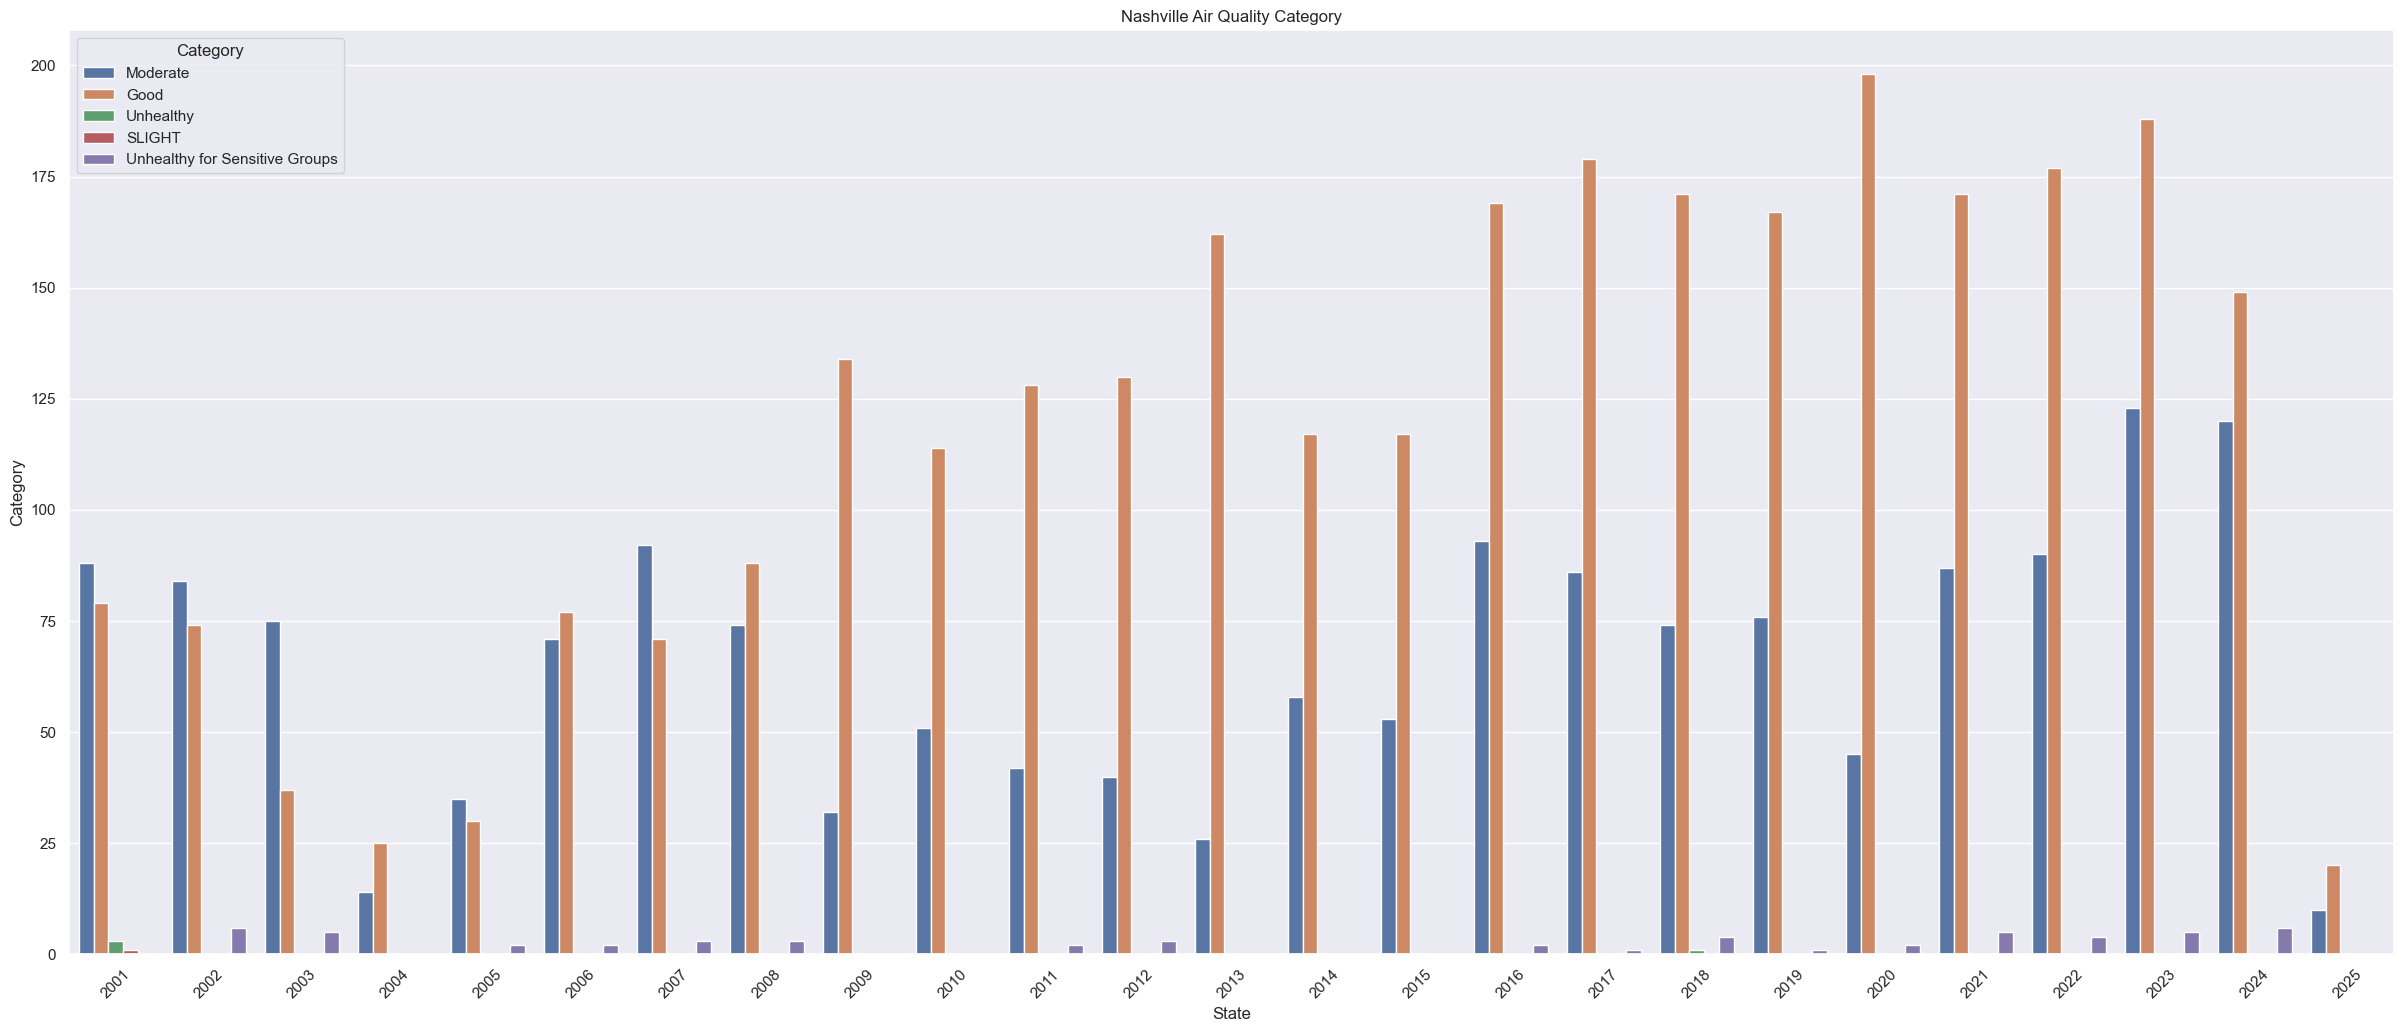

In [12]:

clean_data['Year'] = clean_data['ReportDateTime'].dt.year
sns.countplot(data=clean_data, x='Year', hue='Category')
plt.xticks(rotation=45)  # Rotate state labels for readability
plt.xlabel('State')
plt.ylabel('Category')
plt.title('Nashville Air Quality Category')
sns.set_theme(rc={"figure.figsize": (30, 12)})
plt.show()

##### a. How many times has the AQI been recorded above 120?

In [13]:


Data_AQI=clean_data[(clean_data['AQI'] >= 120)]

row_count = len(Data_AQI)
print(f"Number of rows: {row_count}")
    

Number of rows: 13


##### b. When did the Air Quality Index Category become unhealthy?

In [23]:
# unique values in Category column
categories = clean_data['Category'].drop_duplicates()
print(categories)


0                                 Good
2                             Moderate
217     Unhealthy for Sensitive Groups
2507                         Unhealthy
8790                            SLIGHT
Name: Category, dtype: object


In [24]:

data_category=clean_data[(clean_data['Category'] == 'Unhealthy')]
data_unhealthy=data_category[['ResponsiblePollutant', 'PollenCount']]
print(data_unhealthy)

     ResponsiblePollutant  PollenCount
2507           Ozone 8-hr          5.0
8778           Ozone 8-hr          5.0
8786                PM2.5          8.0
8800           Ozone 8-hr          3.0


#### A) Air Quality Index Category becomes unhealthy when pollutant 'PM2.5' reaches 8.0 or 'Ozone 8-hr' reaches 3.0 

#### Question 2: Which pollen type occurs the most? Hint: You can use a scatterplot if needed.

In [16]:
# group by counts
pollutantcount=clean_data['ResponsiblePollutant'].value_counts()
df=pollutantcount.reset_index()

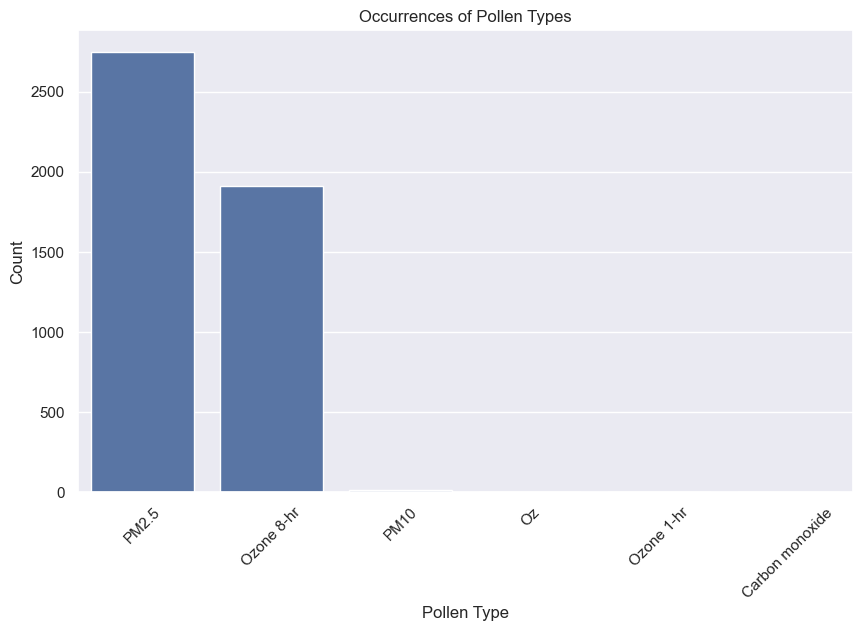

In [17]:
plt.figure(figsize=(10,6))
sns.barplot( data=df, x='ResponsiblePollutant', y='count')
plt.xlabel('Pollen Type')
plt.ylabel('Count')
plt.title('Occurrences of Pollen Types')
plt.xticks(rotation=45)
plt.show()


<Axes: xlabel='ReportDateTime', ylabel='ResponsiblePollutant'>

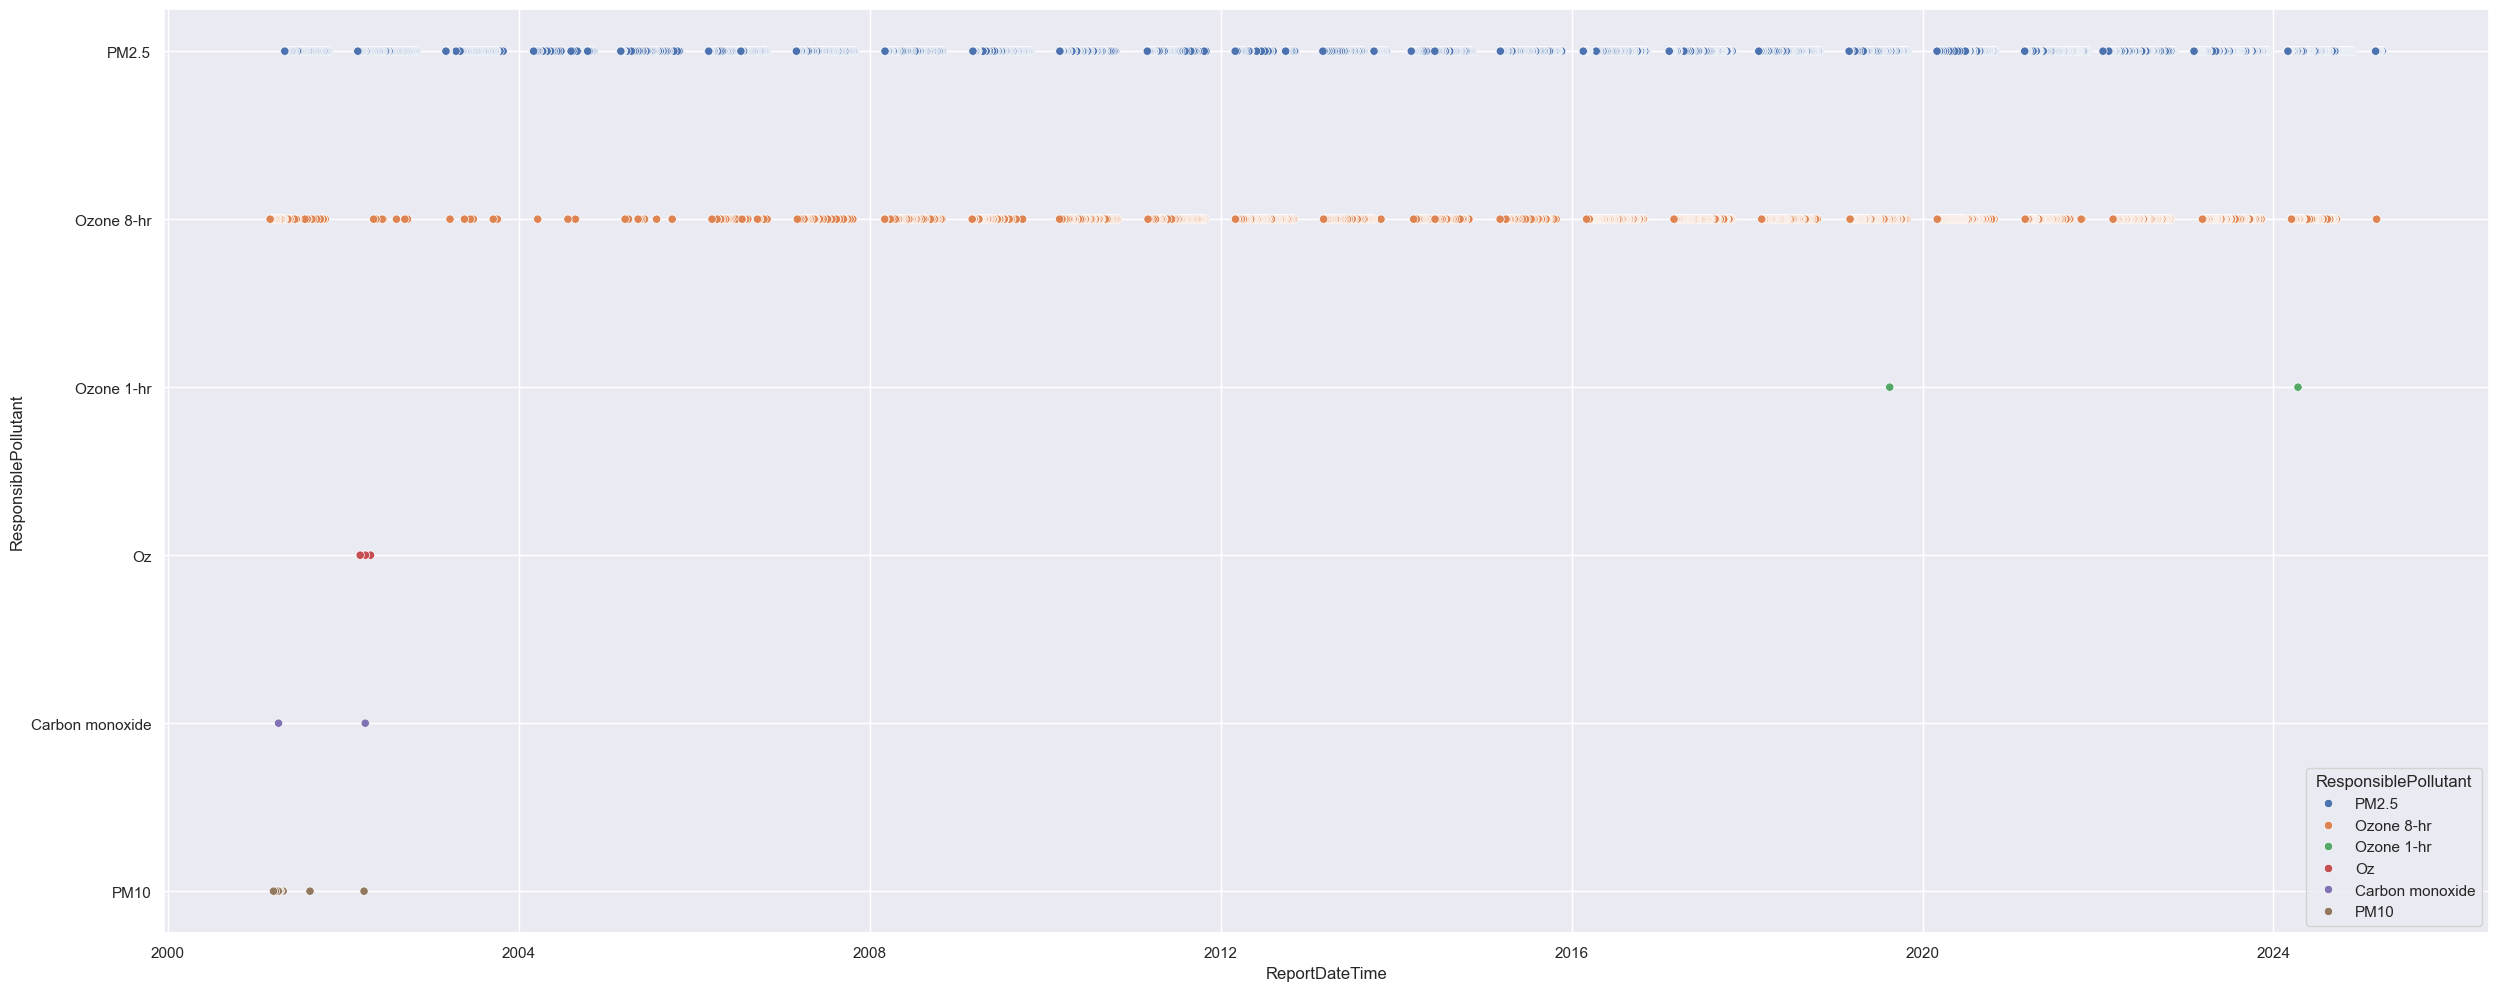

In [18]:
#using scatterplot
sns.scatterplot(data=clean_data, x='ReportDateTime', y='ResponsiblePollutant', hue='ResponsiblePollutant')

### Question 3: [Open-ended] Based on this data, do you think Nashville is a city that is comfortable to live (based on the air quality and pollen only)? Why?

#### A) We cannot say if we can live comfortably in Nashville based on the air quality and pollen.

<Axes: xlabel='PollenCount', ylabel='AQI'>

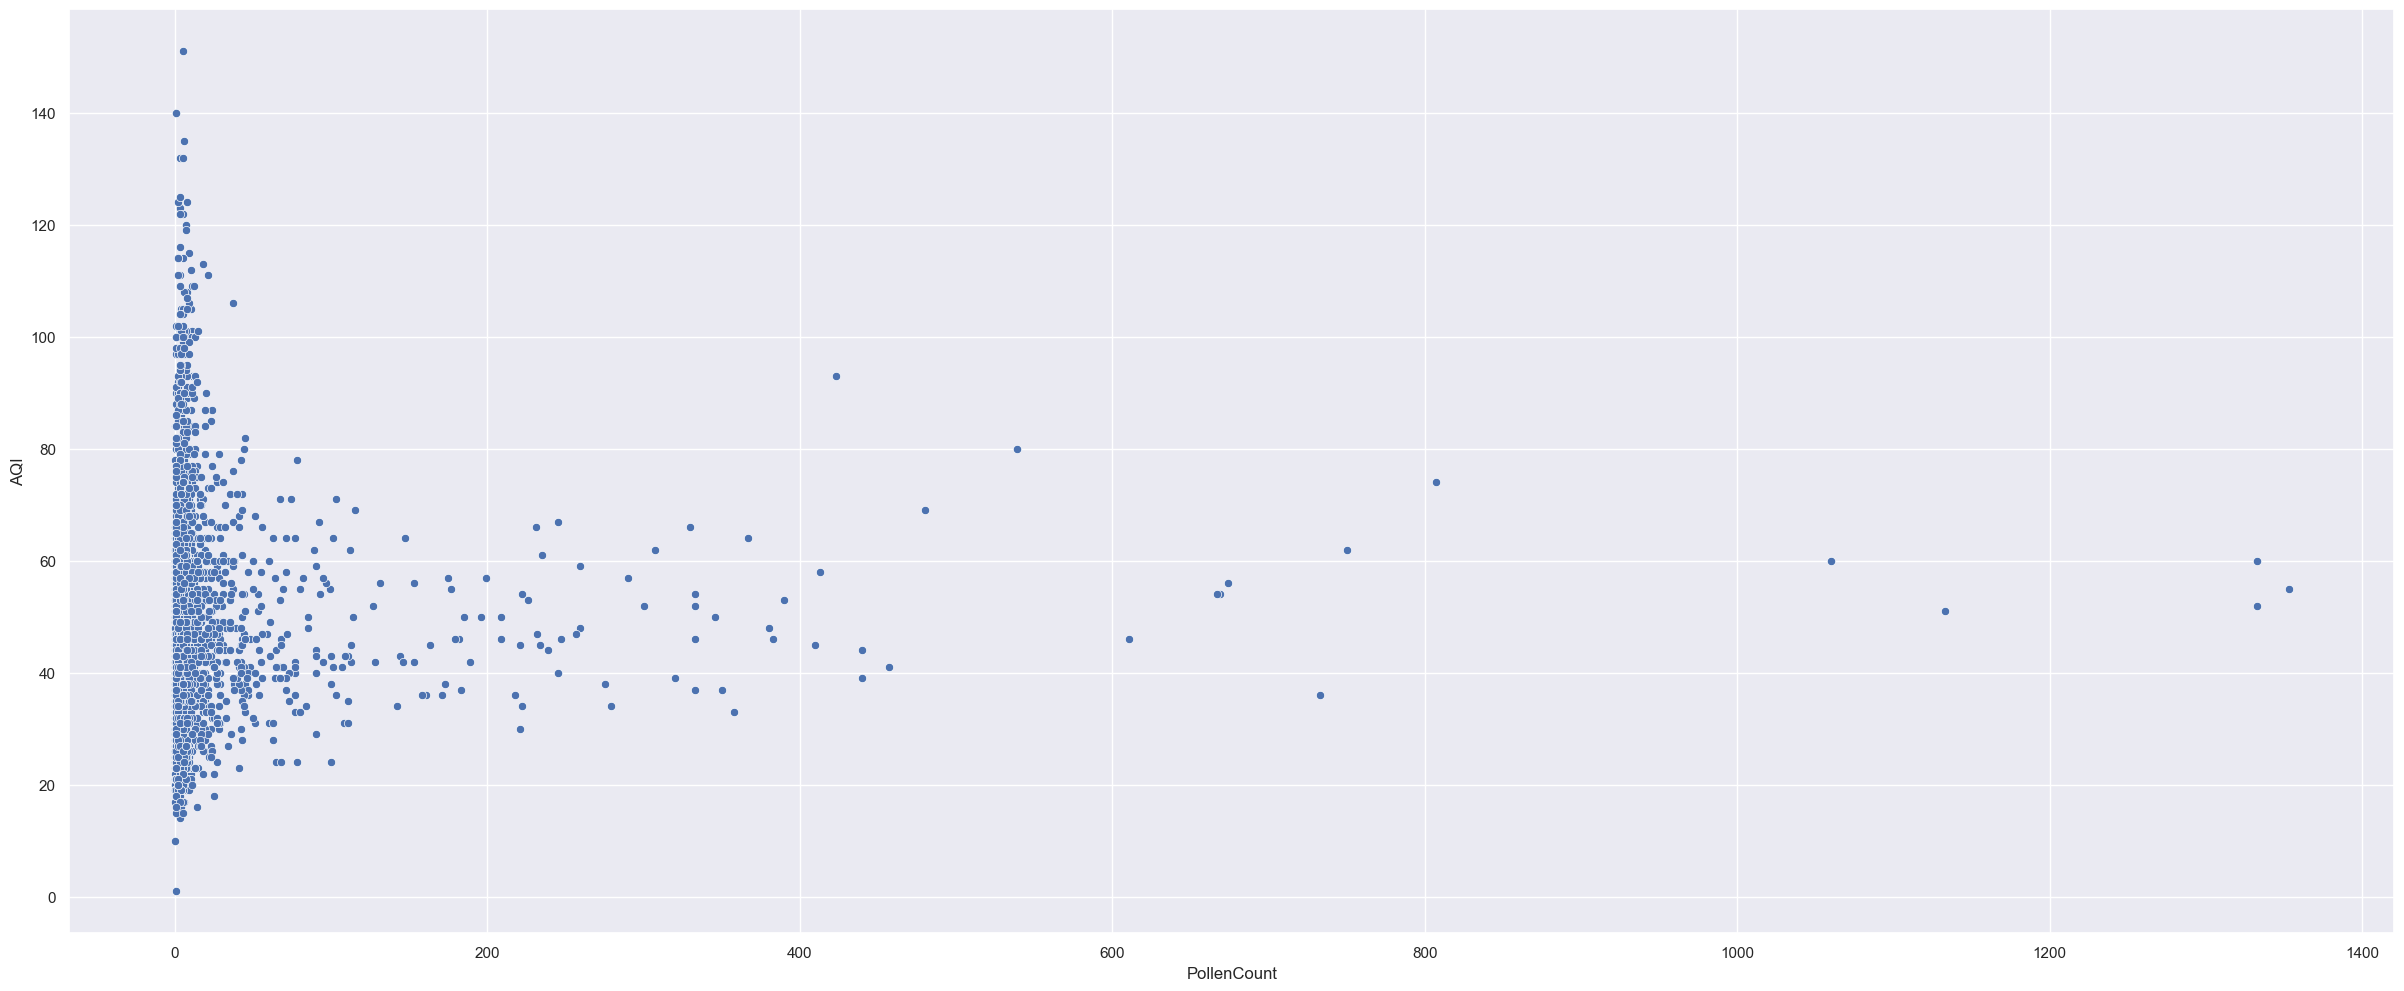

In [19]:
#using scatterplot
sns.scatterplot(data=clean_data, y='AQI', x='PollenCount')

<Axes: xlabel='PollenCount', ylabel='AQI'>

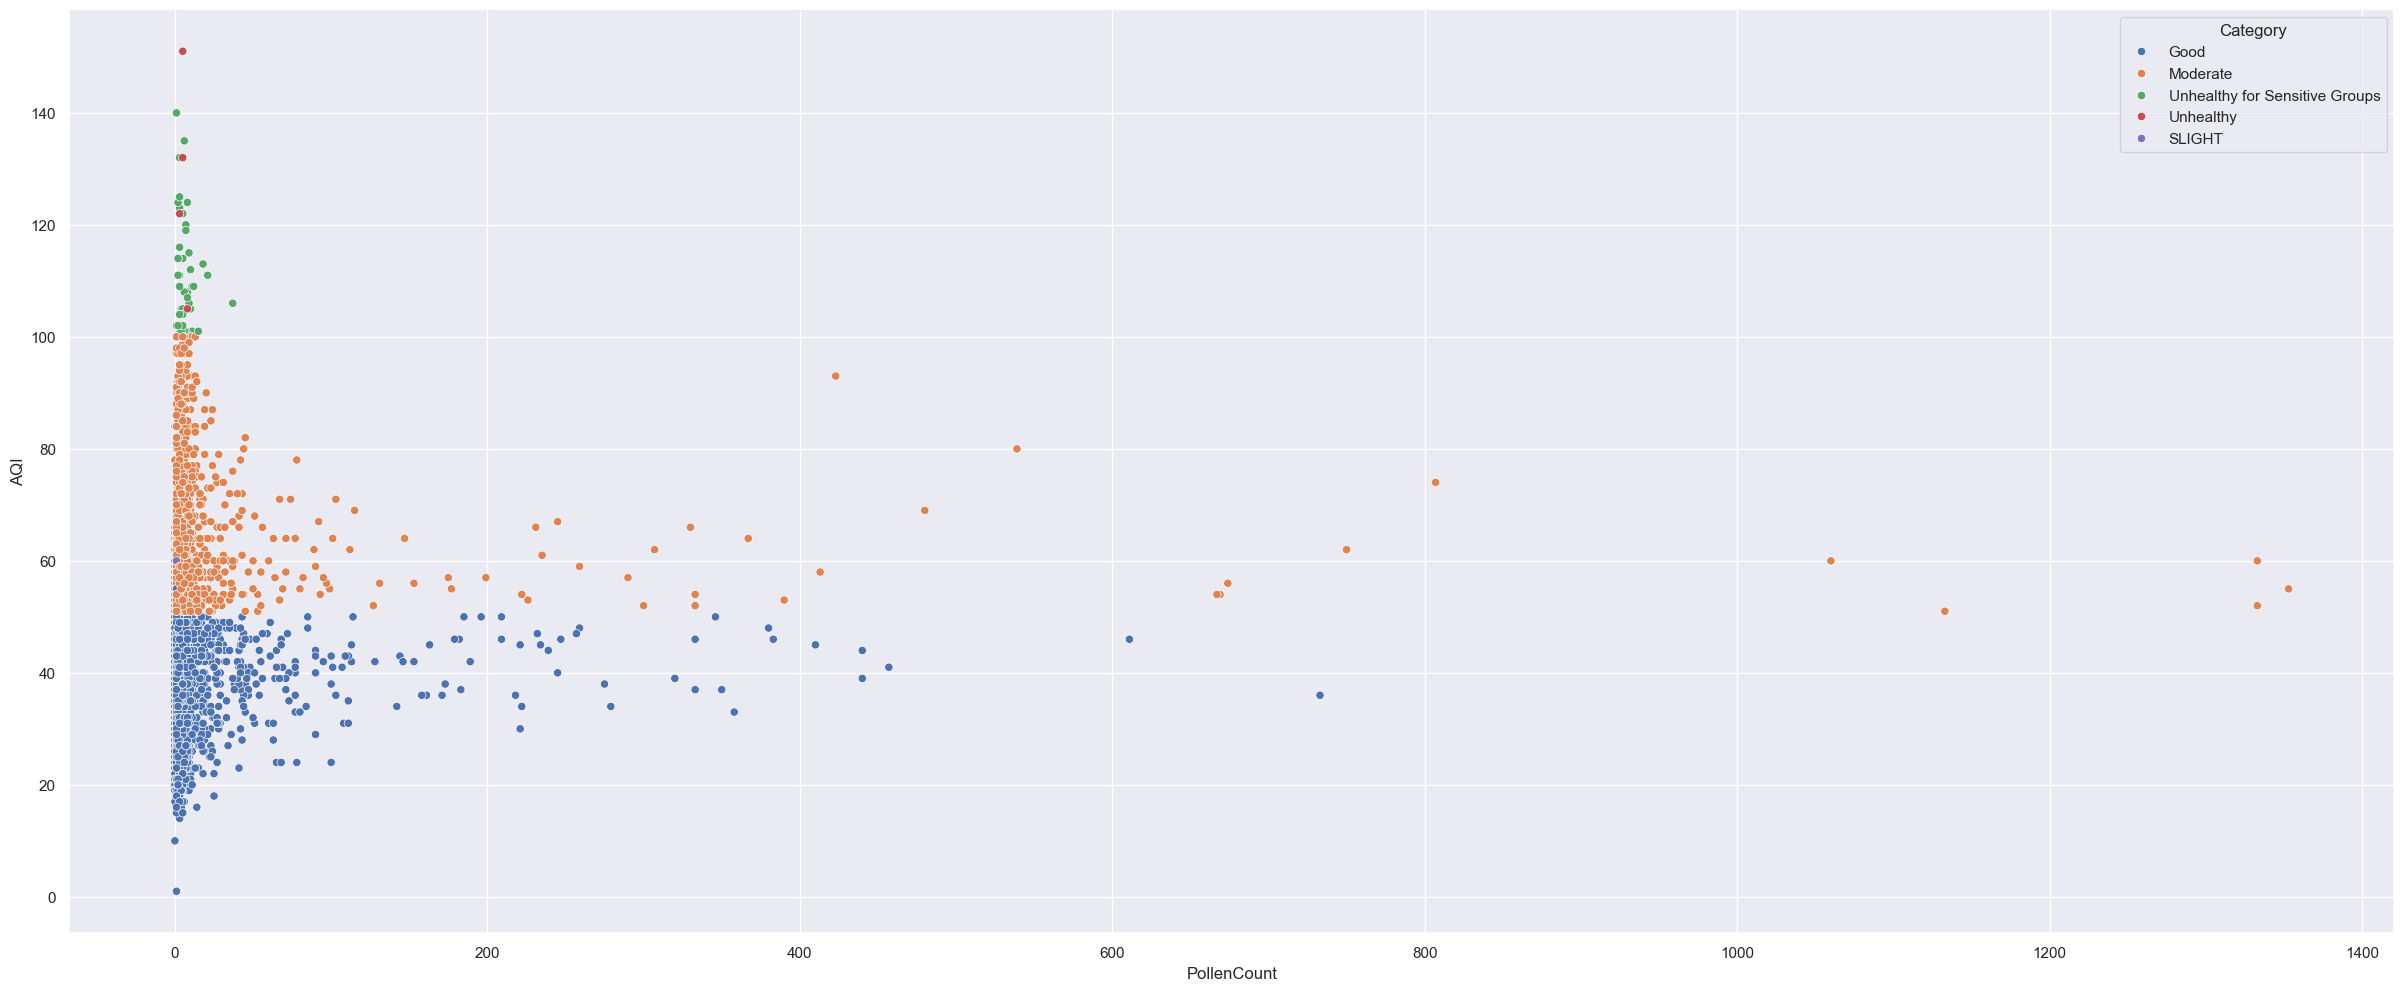

In [20]:
#using scatterplot
sns.scatterplot(data=clean_data, y='AQI', x='PollenCount',hue='Category')


#### However, if we add Category as a hue to the plot, we can say that we can live comfortably in Nashville. because the majority of the time category is 'Good' and 'Moderate'.

### Question 4: [A vectorization problem]. Compare the manual approach versus a vectorized approach to find the mean AQI for each Air Quality Category ('Category' in the table). For the vectorized method, you can use groupby() and mean() method in pandas datatype (ex: data.groupby('ColumnName') and dataList.mean()). For the manual method, a regular for-loop can be used. Calculate the time difference between the two approaches and evaluate.


In [29]:
# import time module
import time
Mean_AQI = {}
time_start = time.time() # record the starting time
for cat in categories:
    cat_data = clean_data[clean_data['Category'] == cat]
    Mean_AQI[cat] = cat_data['AQI'].mean()

time_end = time.time() # record the end time 
time_taken = time_end - time_start 
print(f"Mean Manual AQI: {Mean_AQI}")
print(f"Loop Time taken: {time_taken} seconds")

Mean Manual AQI: {'Good': np.float64(39.738896366083445), 'Moderate': np.float64(62.68029286150092), 'Unhealthy for Sensitive Groups': np.float64(109.98214285714286), 'Unhealthy': np.float64(127.5), 'SLIGHT': np.float64(60.0)}
Loop Time taken: 0.07978320121765137 seconds


In [31]:
# import time module


time_start = time.time() # record the starting time

Mean_AQI_groupby = clean_data.groupby('Category')['AQI'].mean()
time_end = time.time() # record the end time 
time_taken = time_end - time_start 
print(f"Mean Group AQI: {Mean_AQI_groupby}")
print(f"Loop Time taken: {time_taken} seconds")

Mean Group AQI: Category
Good                               39.738896
Moderate                           62.680293
SLIGHT                             60.000000
Unhealthy                         127.500000
Unhealthy for Sensitive Groups    109.982143
Name: AQI, dtype: float64
Loop Time taken: 0.008217811584472656 seconds


### Part 2 – GitHub practice

 1. Create a GitHub repository on your account called MSBD566. Make the repository public (you can make it private after the assignment has been graded).


2. In your repository, you should have:
a. A folder called Assignment 1, and in the folder, add:
i. Your Python notebook created in Part 1:
MSBD566_<LastName>_<FirstName>_Assignment1.ipynb
ii. The data file provided to run Part 1: Air_Quality_and_Pollen_Count.csv
b. A README.md containing a short description of your repo. Add the last edited date on the last line of the README, something like this:


3. If you created your repository on your local machine, you can zip the whole folder for submission. If you have it only on the cloud (i.e., the GitHub website), you will need to clone or download it and upload the zip file to the Blackboard.
4. Submit your repository link AND your downloaded repository where you find this document.